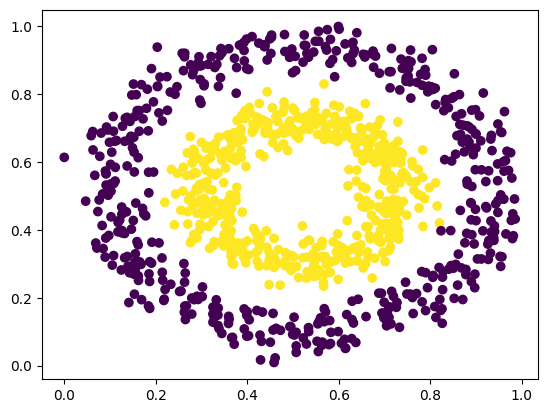

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary

# Create the artificial dataset
X, y = make_circles(n_samples=1000, noise=0.09, factor=0.5, random_state=42)

# Turn the dataset in tensors
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

# Normalizing the dataset
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

# Separating the data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

In [2]:
class CircleDetection(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.sequence = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.sequence(x)
    
model = CircleDetection()
model

CircleDetection(
  (sequence): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [3]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.6)

epochs = 1200
ls = []

for epoch in range(epochs):
    ### Train
    model.train()

    # 1. Forward
    pred = model(X_train).squeeze()

    # 2. Loss
    loss = loss_fn(pred, y_train)

    # 3. Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        ls.append(float(loss))
        print('Epoch: {:<5d}   |  Loss: {:.5f}'.format(epoch, loss))
    


Epoch: 0       |  Loss: 0.69725
Epoch: 100     |  Loss: 0.54678
Epoch: 200     |  Loss: 0.27224
Epoch: 300     |  Loss: 0.02924
Epoch: 400     |  Loss: 0.01629
Epoch: 500     |  Loss: 0.01144
Epoch: 600     |  Loss: 0.00889
Epoch: 700     |  Loss: 0.00730
Epoch: 800     |  Loss: 0.00621
Epoch: 900     |  Loss: 0.00541
Epoch: 1000    |  Loss: 0.00480
Epoch: 1100    |  Loss: 0.00433


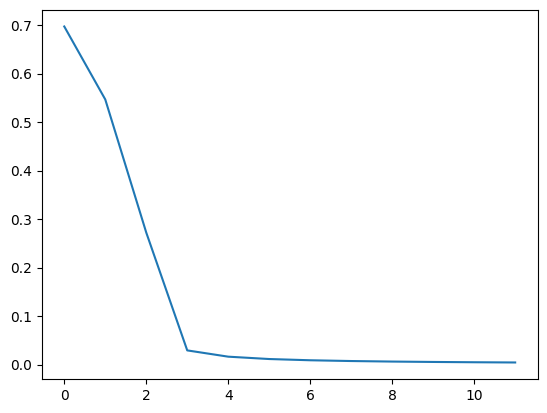

In [4]:
plt.plot(ls)

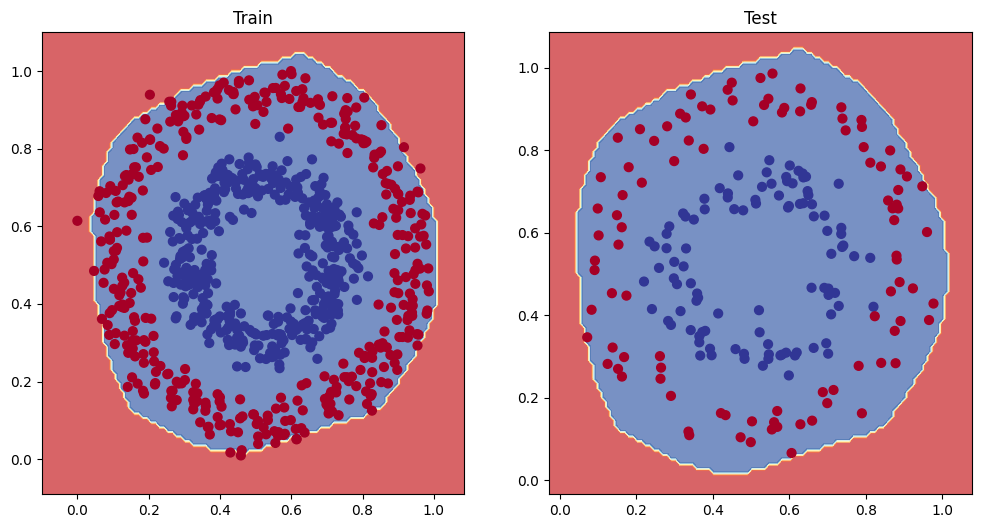

In [6]:
# Ploting the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)